# Lab 1
## Dynamic model of a multi-link manipulator

## Steps

### 0. Import the necessary libraries

In [1]:
from math import pi
import numpy as np
import roboticstoolbox as rtb
import matplotlib.pyplot as plt

### 1. Import robot model (ex. Puma560)

In [2]:
robot = rtb.models.DH.Puma560()
print(robot)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴──

### 2. Fill in the parameters of the robot model (in the example, filled in for the Puma560 robot)

0. Using dyn() you can view the dynamic parameters of each link

In [ ]:
print(robot.links[0].dyn())  # initial dynamic parameters of the first link

m     =         0 
r     =         0        0        0 
        |        0        0        0 | 
I     = |        0     0.35        0 | 
        |        0        0        0 | 
Jm    =    0.0002 
B     =    0.0015 
Tc    =       0.4(+)    -0.43(-) 
G     =       -63 
qlim  =      -2.8 to      2.8


1. Let's define the mass of the links

In [4]:
robot.links[0].m = 20
robot.links[1].m = 17.4
robot.links[2].m = 4.8
robot.links[3].m = 0.82
robot.links[4].m = 0.34
robot.links[5].m = 0.09

2. Let's define the center of mass of each link

In [5]:
robot.links[0].r = [0, 0, 0]
robot.links[1].r = [-0.3638, 0.006, 0.2275]
robot.links[2].r = [-0.0203, -0.0141, 0.07]
robot.links[3].r = [0, 0.019, 0]
robot.links[4].r = [0, 0, 0]
robot.links[5].r = [0, 0, 0.032]

3. Let's define the inertia tensor of each link. Filling: [Lxx, Lyy, Lzz, Lxy, Lyz, Lxz]

In [6]:
robot.links[0].I = [0, 0.35, 0, 0, 0, 0]
robot.links[1].I = [0.13, 0.524, 0.539, 0, 0, 0]
robot.links[2].I = [0.066, 0.086, 0.0125, 0, 0, 0]
robot.links[3].I = [0.0018, 0.0013, 0.0018, 0, 0, 0]
robot.links[4].I = [0.0003, 0.0004, 0.0003, 0, 0, 0]
robot.links[5].I = [0.00015, 0.00015, 0.00004, 0, 0, 0]

4. Let's set the moment of inertia of the drive

In [7]:
robot.links[0].Jm = 0.0004
robot.links[1].Jm = 0.0004
robot.links[2].Jm = 0.0004
robot.links[3].Jm = 0.000033
robot.links[4].Jm = 0.000033
robot.links[5].Jm = 0.000033

5. Let's define the coefficient of viscous friction of the drive

In [8]:
robot.links[0].B = 0.0015
robot.links[1].B = 0.000817
robot.links[2].B = 0.00138
robot.links[3].B = 0.0000712
robot.links[4].B = 0.0000826
robot.links[5].B = 0.0000367

6. Let's define the coefficient of Coulomb friction of the drive

In [9]:
robot.links[0].Tc = [0.395, -0.435]
robot.links[1].Tc = [0.126, -0.071]
robot.links[2].Tc = [0.132, -0.105]
robot.links[3].Tc = [0.0112, -0.0169]
robot.links[4].Tc = [0.00926, -0.0145]
robot.links[5].Tc = [0.00396, -0.0105]

7. Let's set the gear ratio for each link

In [10]:
robot.links[0].G = -62.6111
robot.links[1].G = 107.8150000000000
robot.links[2].G = -53.7063
robot.links[3].G = 76.0364
robot.links[4].G = 71.923
robot.links[5].G = 76.686

8. Let's set restrictions on the generalized coordinates for each link

In [11]:
robot.links[0].qlim = [-2.792526803190927, 2.792526803190927]
robot.links[1].qlim = [-0.785398163397448, 3.926990816987241]
robot.links[2].qlim = [-3.926990816987241, 0.785398163397448]
robot.links[3].qlim = [-1.919862177193763, 2.967059728390360]
robot.links[4].qlim = [-1.745329251994330, 1.745329251994330]
robot.links[5].qlim = [-4.642575810304916, 4.642575810304916]

### 3. Set the initial and final positions of the robot and plot them

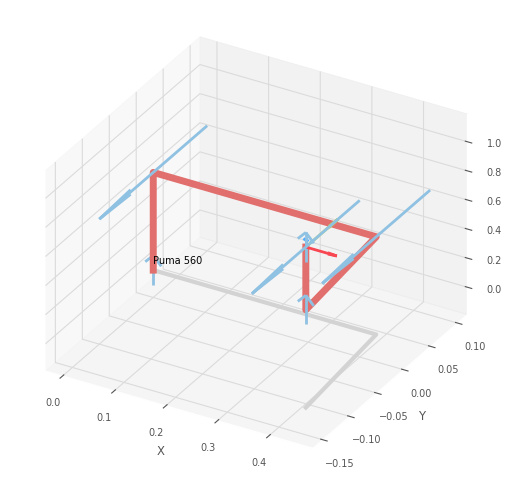

<Figure size 640x480 with 0 Axes>

In [12]:
q_start = [0, 0, 0, 0, 0, 0]
robot.plot(q_start)
plt.show()

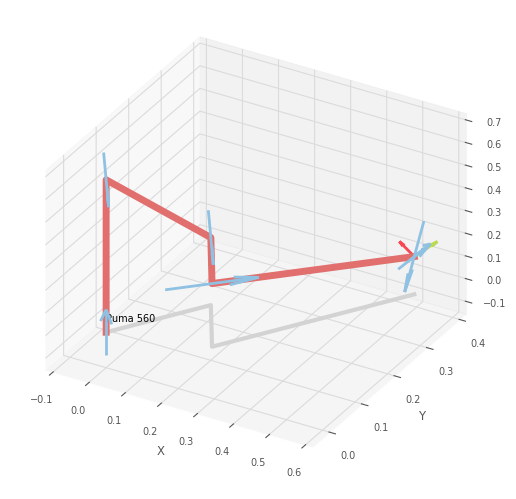

<Figure size 640x480 with 0 Axes>

In [13]:
q_end = [pi/4, -pi/3, -pi/4, pi/3, -pi/3, pi/4]
robot.plot(q_end)
plt.show()

### 4. Plan the trajectory with prebuilt functions

In [14]:
N = 100
t_start = 0
t_stop = 5
t_shag = t_stop/N
time = np.arange(t_start, t_stop, t_shag)
tr = rtb.jtraj(q_start, q_end, time)

### 5. Solve the inverse dynamics

In [ ]:
tau = robot.rne(tr.q, tr.qd, tr.qdd).T

tau0 = robot.rne(tr.q, np.zeros([N,6]), np.zeros([N,6])).T

### 6. Obtain the components of the dynamic equation

In [16]:
M = robot.inertia(tr.q)
C = robot.coriolis(tr.q, tr.qd)
G = robot.gravload(tr.q)

M0 = robot.inertia(tr.q)
C0 = robot.coriolis(tr.q, np.zeros([N,6]))
G0 = robot.gravload(tr.q)

### 7. Plot the graphs

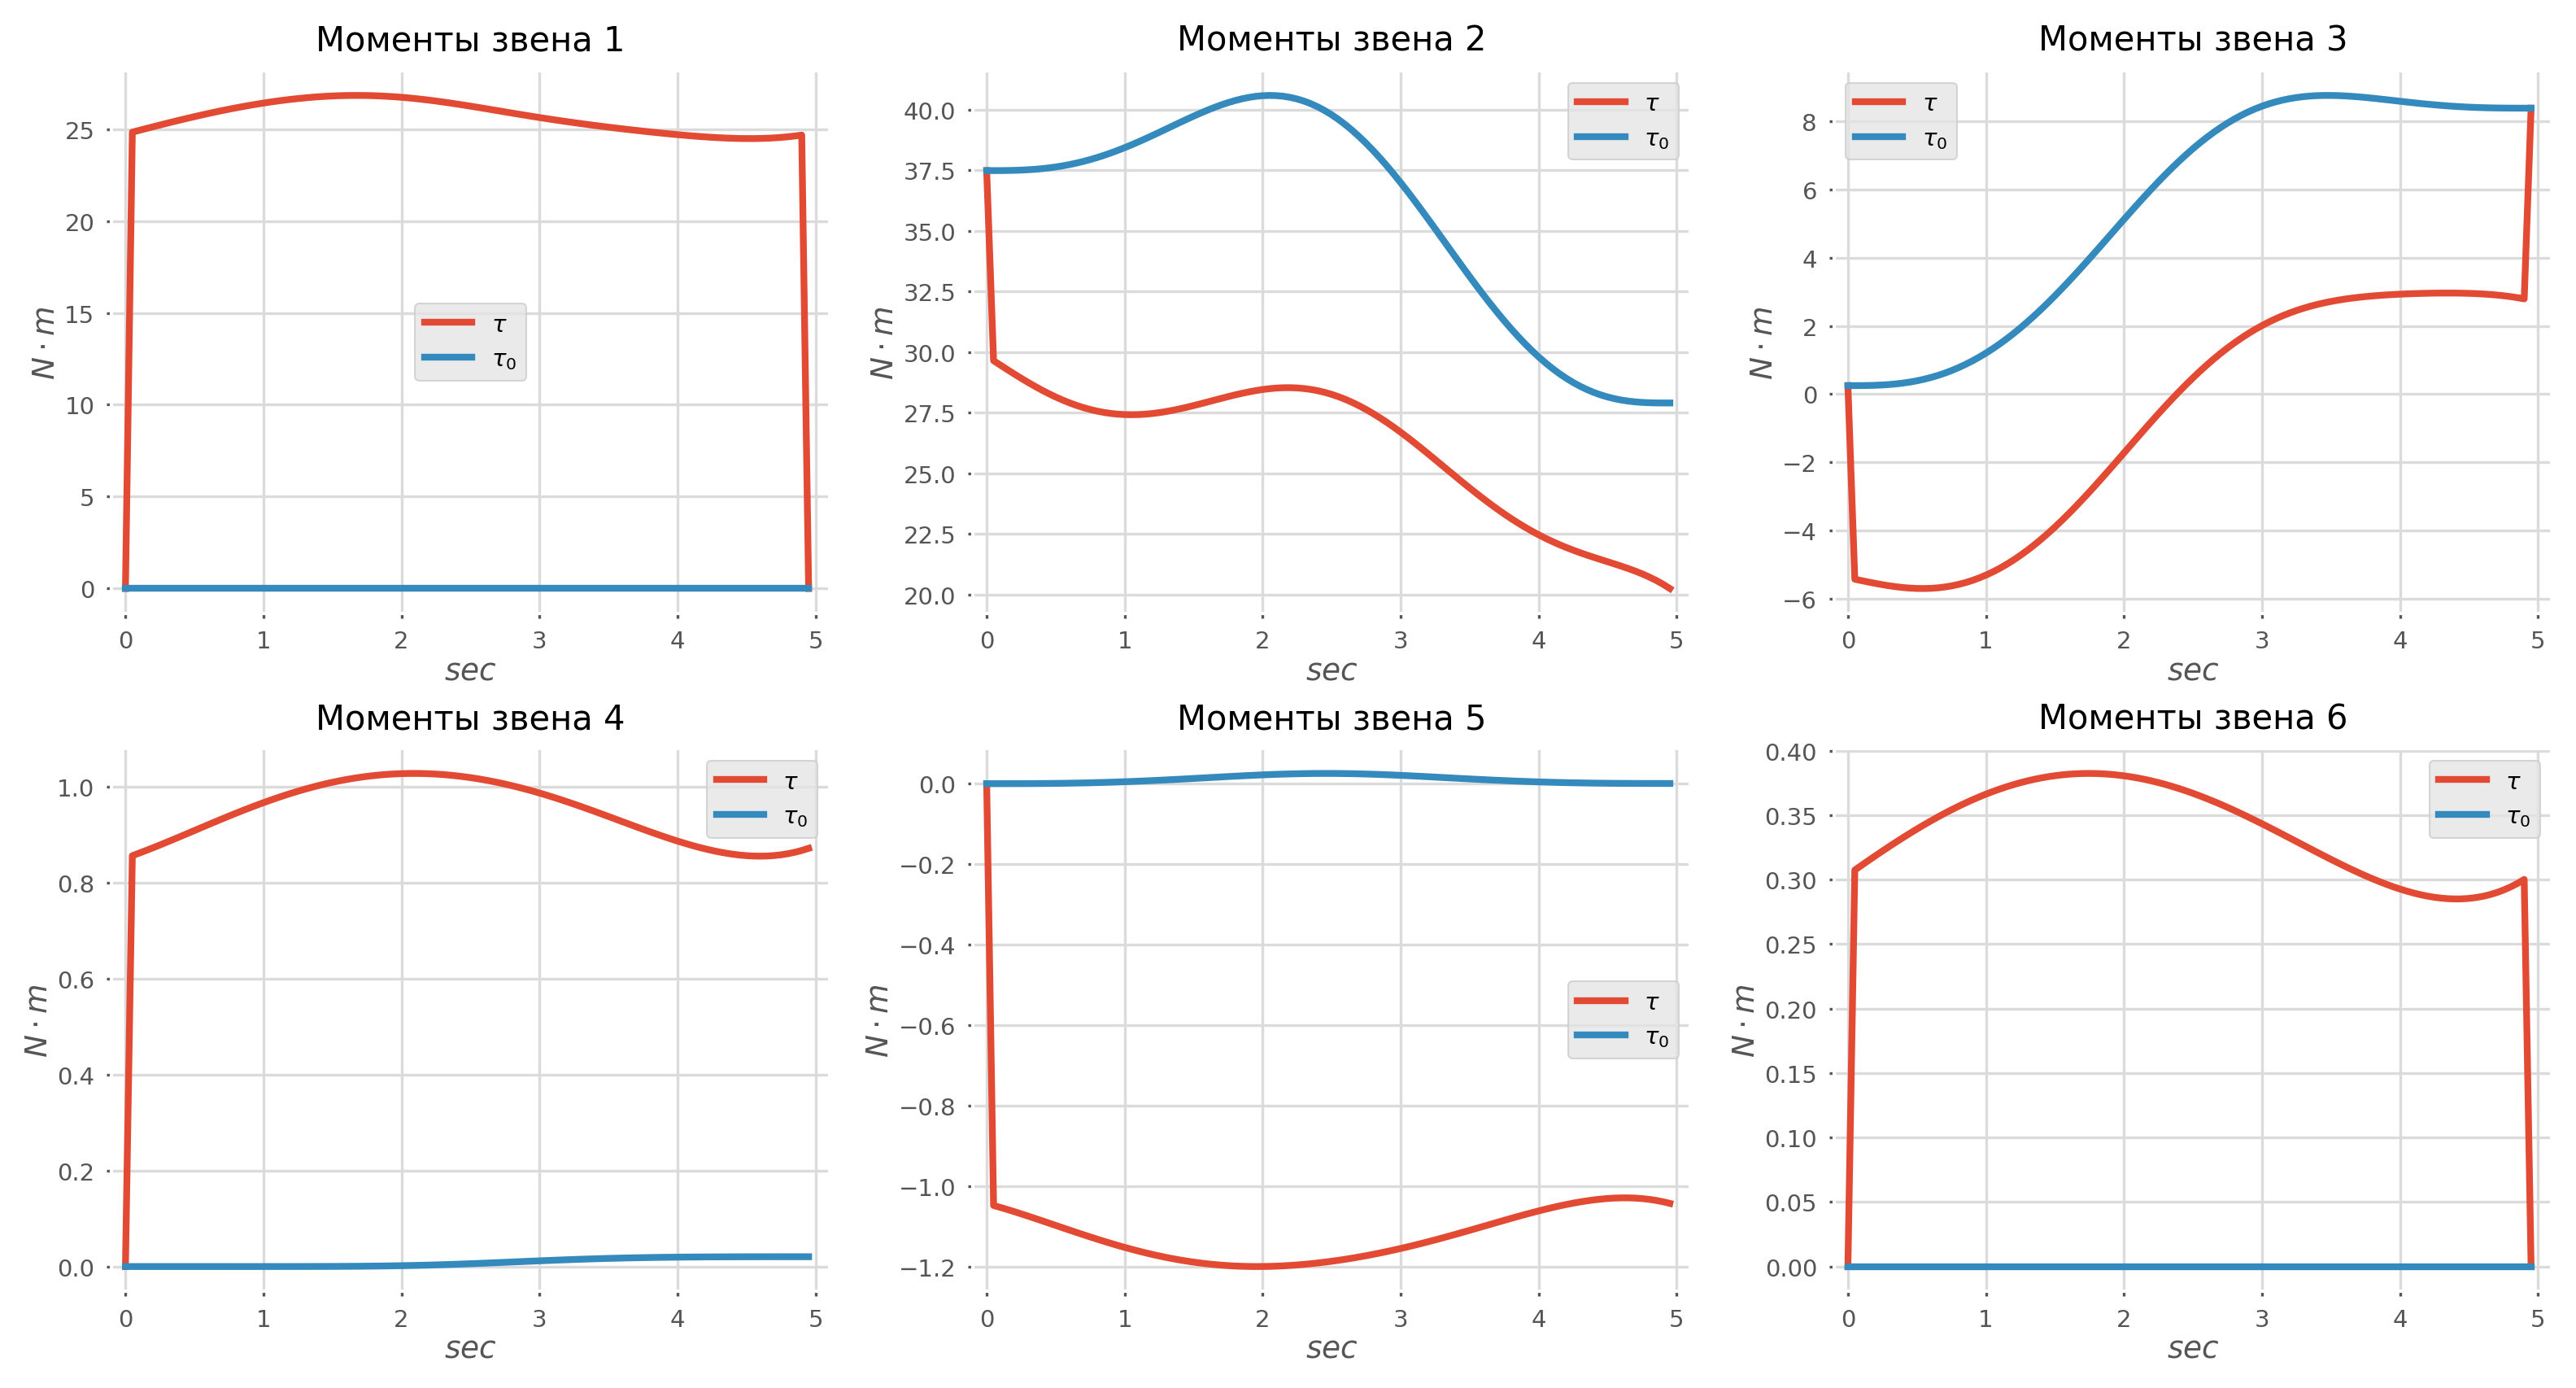

In [ ]:
plt.figure(figsize=(10,5), dpi=300)  # Задаем размеры холста и плотность точек (четкость графика)
for g in range(6):
    plt.subplot(2,3,g+1)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.25)  # Задаем интервалы между графиками, чтоб не перекрывали друг друга
    plt.plot(time, tau[g], linewidth=2, label=r"$\tau$")  # Строим график
    plt.plot(time, tau0[g], linewidth=2, label=r"$\tau_{0}$")  # Строим график
    plt.title(r"Link moment {}".format(g+1), fontsize=10)  # Название графика
    plt.ylabel(r"$N \cdot m$", fontsize=9)  # Подпись оси Y
    plt.xlabel(r"$sec$", fontsize=9)  # Подпись оси X
    plt.grid(True)  # Добавить сетку
    plt.legend()  # Отобразить легенду (покажет то, что написано в 'label')
    ax = plt.gca()  # gca = get current axis - чтобы редактировать конкретную фигуру
    ax.set_facecolor((1,1,1))  # Цвет фона на графике
    ax.set_xlim([t_start-0.1,t_stop+0.1])  # Пределы по оси X
plt.show()